### IMPORT LIBRARIES

In [9]:
library(tseries)
library(zoo)
library(psych)
library(lmtest)
library(forecast)
library(readxl)
library(tseries)
library(xts)

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### IMPORT STOCK PRICE

In [11]:
data= get.hist.quote(instrument="msft",start = "2015-01-01", end = "2021-05-05", quote = "AdjClose")

# The first 10 days of stock price
head(data,10)

time series starts 2015-01-02
time series ends   2021-05-04


           Adjusted
2015-01-02 41.34821
2015-01-05 40.96798
2015-01-06 40.36669
2015-01-07 40.87954
2015-01-08 42.08214
2015-01-09 41.72844
2015-01-12 41.20673
2015-01-13 40.99450
2015-01-14 40.64080
2015-01-15 40.21636

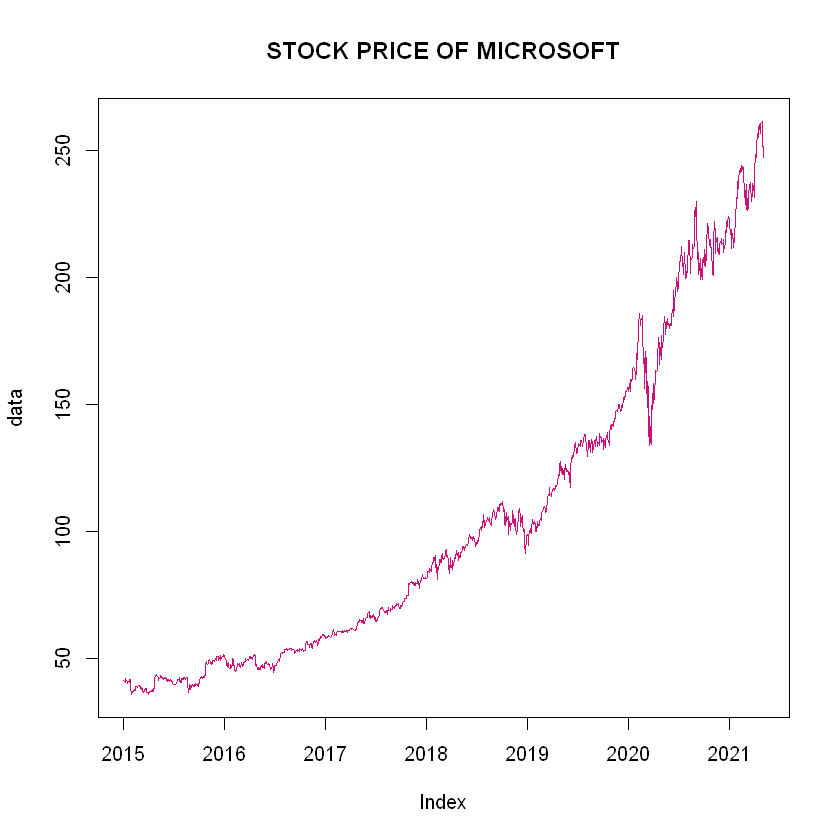

In [14]:
# Stock price visualization
plot(data,col='deeppink3',main='STOCK PRICE OF MICROSOFT')

In [34]:
data_return=diff(data)/ data[1:1594]
data_price=coredata(data)[-1]

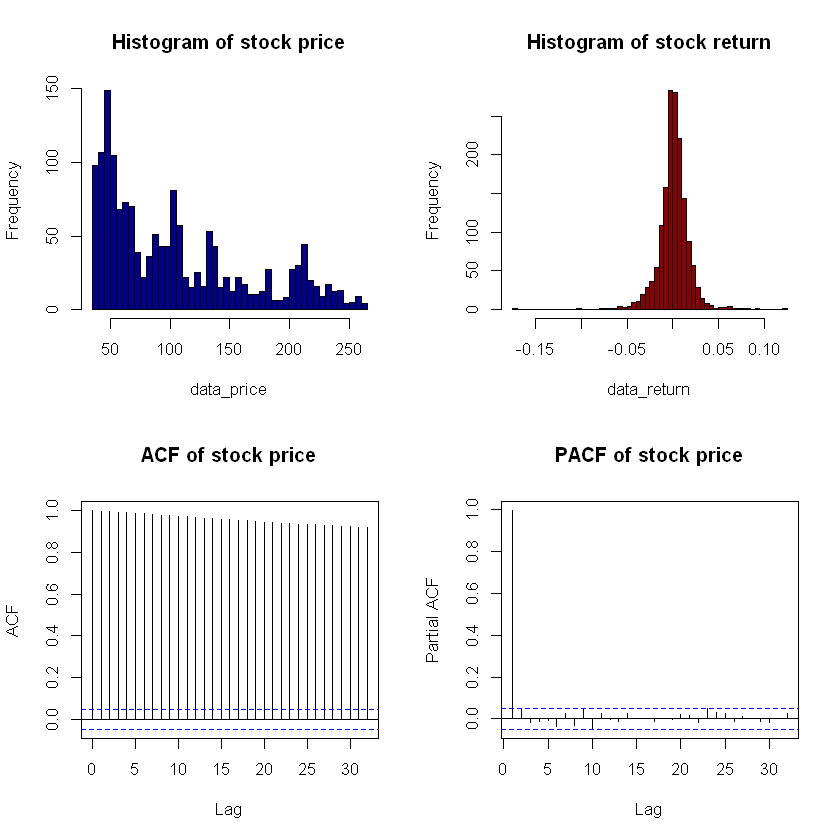

In [35]:
layout(matrix(c(1,2,3,4),2,2,byrow=TRUE))
hist(data_price, col='darkblue', breaks=50, main='Histogram of stock price')
hist(data_return, col='darkred', breaks= 50, main='Histogram of stock return')
acf(data_price, main='ACF of stock price')
pacf(data_price, main='PACF of stock price')

### STATIONARY TEST

##### ADF TEST

In [40]:
adf.test(data_price)


	Augmented Dickey-Fuller Test

data:  data_price
Dickey-Fuller = -1.423, Lag order = 11, p-value = 0.8226
alternative hypothesis: stationary


##### KPSS TEST

In [41]:
kpss.test(data_price)

Warning message in kpss.test(data_price):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  data_price
KPSS Level = 18.106, Truncation lag parameter = 7, p-value = 0.01


### NORMAL ROLLING WINDOW APPROACH

In [42]:
forecasted_series1 = c()
actual_series1 = c()

for (i in 1:593)
{
data_price.test <- data_price[i:1000+i]
data_price.train <- data_price[1000+i:1594]

fit<-auto.arima(data_price.test) 

data_price.forecast = forecast(fit,h=1)

forecasted_series1[i] = data_price.forecast$mean[1]
actual_series1[i] = data_price[1000+i+1]
}

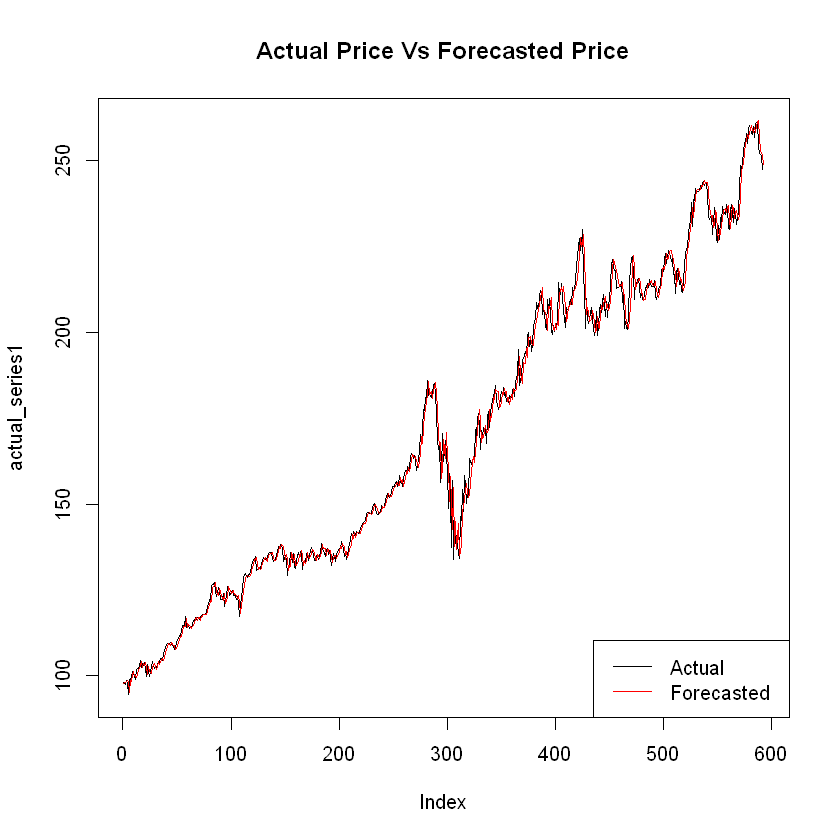

In [79]:
#RESULT PLOTTING
plot(actual_series1,type='l',main='Actual Price Vs Forecasted Price')
lines(forecasted_series1,lwd=1.5,col='red')
legend('bottomright',c("Actual","Forecasted"),lty=c(1,1),lwd=c(1.5,1.5),col=c('black','red'))

### RECURSIVE FORECASTING MODEL

In [45]:
forecasted_series = c()
actual_series = c()

for (i in 1000:1593)
{
data_price.test <- data_price[1:i]
data_price.train <- data_price[i+1:1594]

fit<-auto.arima(data_price.test) 

data_price.forecast = forecast(fit,h=1)

forecasted_series[i-999] = data_price.forecast$mean[1]
actual_series[i-999] = data_price[i+1]
}

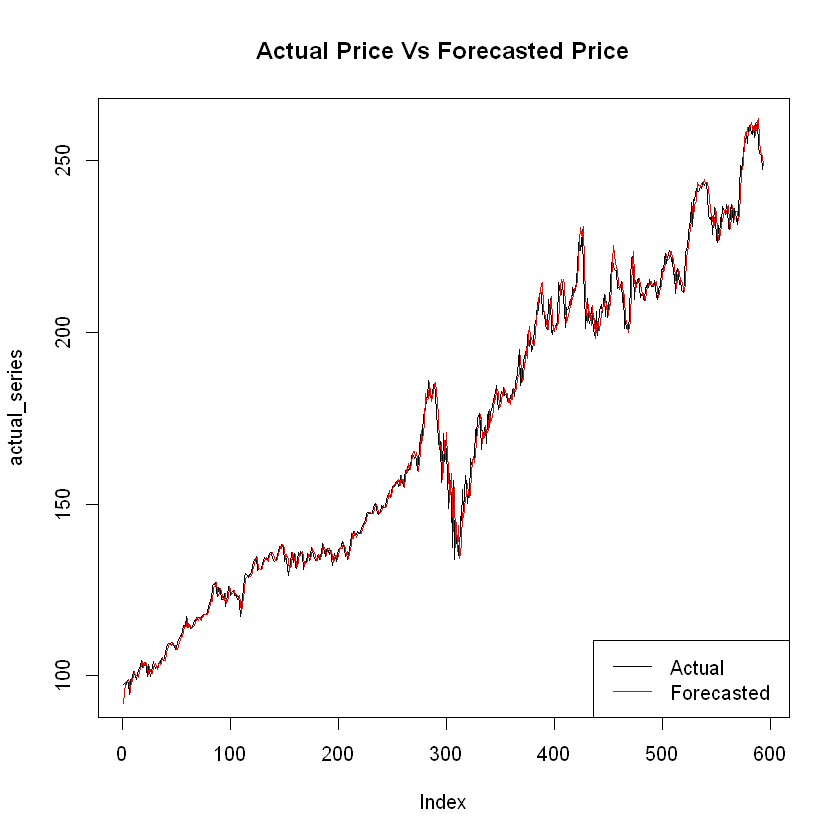

In [78]:
plot(actual_series,type='l',main='Actual Price Vs Forecasted Price')
lines(forecasted_series,lwd=1.5,col='red')
legend('bottomright',c("Actual","Forecasted"),lty=c(1,1),lwd=c(1.5,1.5),col=c('black','red'))

### PERFORMANCE VALUATION

##### MEAN SQUARE ERROR

In [71]:
# ROLLING WINDOW METHOD
mean(((actual_series1 - forecasted_series1)^2)[1:592])

[1] 11.75942

In [72]:
# RECURSIVE METHOD
mean(((actual_series - forecasted_series)^2)[1:592])

[1] 11.91153

##### MEAN ABSOLUTE PERCENT ERROR

In [77]:
# ROLLING WINDOW METHOD
mean((abs((actual_series1 - forecasted_series1)/actual_series1))[1:592])*100

[1] 1.34703

In [76]:
# RECURSIVE METHOD
mean(abs((actual_series - forecasted_series)/actual_series)[1:592])*100

[1] 1.370942